<a href="https://colab.research.google.com/github/poojitharajapuram/Hw2/blob/main/Hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/poojitharajapuram/Hw2/main/Housing.csv"
Housing_data = pd.read_csv(url)
display(Housing_data)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
Housing_data.shape

(545, 13)

In [ ]:
Housing_data.isnull().sum()*100/Housing_data.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
train,test= train_test_split(Housing_data, train_size = 0.8, test_size = 0.2, random_state = 100)
train.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,8050,3,1,1,yes,yes,yes,no,yes,1,no,furnished
41,7840000,6360,3,2,4,yes,no,no,no,yes,0,yes,furnished
91,6419000,6750,2,1,1,yes,yes,yes,no,no,2,yes,furnished
118,5950000,6420,3,1,1,yes,no,yes,no,yes,0,yes,furnished
472,3010000,3630,4,1,2,yes,no,no,no,no,3,no,semi-furnished


In [ ]:
def preprocess(data,variables):
  Housing_data = data[variables].replace({'yes':1,'no':0})
  X = Housing_data.iloc[:,1:]
  m = X.shape[0]
  Y = np.array(Housing_data.iloc[:,0],dtype=np.float128).reshape(m,1)
  X = np.array(X,dtype=np.float128)
  f_col = np.ones((m,1))
  X = np.hstack((f_col,X))
  return X,Y


In [ ]:
def find_loss(X, Y, theta):
    m = Y.shape[0]
    h = X @ theta
    error = h - Y
    J = (1 / (2 * m)) * np.sum(error ** 2)
    return J


In [ ]:
def find_linear_regression(X_train , X_test , Y_train , Y_test , theta , alpha, iterations):
    m = Y_train.shape[0]
    loss_history1 = np.zeros(iterations)
    loss_history2 = np.zeros(iterations)
    for i in range(iterations):
        h = X_train @ theta
        error = h - Y_train
        dj_dtheta = (1 / m) * X_train.T @ error
        theta = theta - alpha * dj_dtheta
        loss_history1[i] = find_loss(X_train, Y_train, theta)
        loss_history2[i] = find_loss(X_test, Y_test, theta)
    return theta, loss_history1, loss_history2

In [ ]:
variables=['price' , 'area', 'bedrooms' , 'bathrooms' , 'stories' , 'parking']
X_train1a,Y_train1a = preprocess(train,variables)
X_test1a,Y_test1a = preprocess(test,variables)


In [ ]:
theta = np.zeros(6).reshape(6,1)
iterations1 = 9500
alpha= 0.00000001
theta1a,t_cost1a,v_cost1a = find_linear_regression(X_train1a,X_test1a,Y_train1a,Y_test1a,theta,alpha,iterations1)
print(theta1a)
print(t_cost1a[-1])
print(v_cost1a[-1])

[[ 34.42350657]
 [861.78903028]
 [129.84454684]
 [ 75.77826798]
 [116.50119168]
 [ 26.91218263]]
1689710547306.8643
1609099784242.538


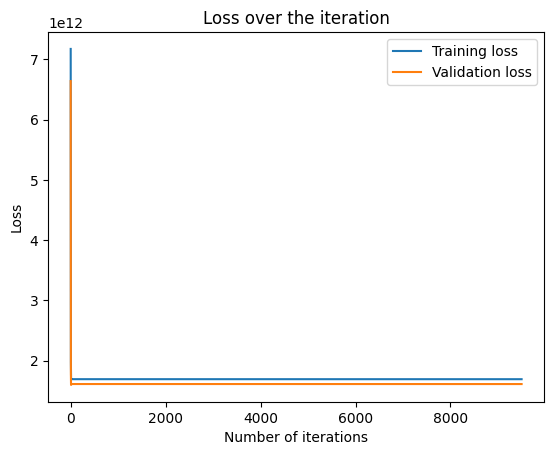

In [227]:
plt.plot([X for X in range(iterations1)],t_cost1a,label="Training loss")
plt.plot([X for X in range(iterations1)],v_cost1a,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

In [ ]:
theta = np.zeros(6).reshape(6,1)
iterations2 = 50
alpha2 = 0.02
theta1a1,t_cost1a1,v_cost1a1 = find_linear_regression(X_train1a,X_test1a,Y_train1a,Y_test1a,theta,alpha2,iterations2)
iterations3 = 50
alpha3= 0.4
theta1a2,t_cost1a2,v_cost1a2 = find_linear_regression(X_train1a,X_test1a,Y_train1a,Y_test1a,theta,alpha3,iterations3)
iterations4 = 50
alpha4= 0.06
theta1a3,t_cost1a3,v_cost1a3 = find_linear_regression(X_train1a,X_test1a,Y_train1a,Y_test1a,theta,alpha4,iterations4)

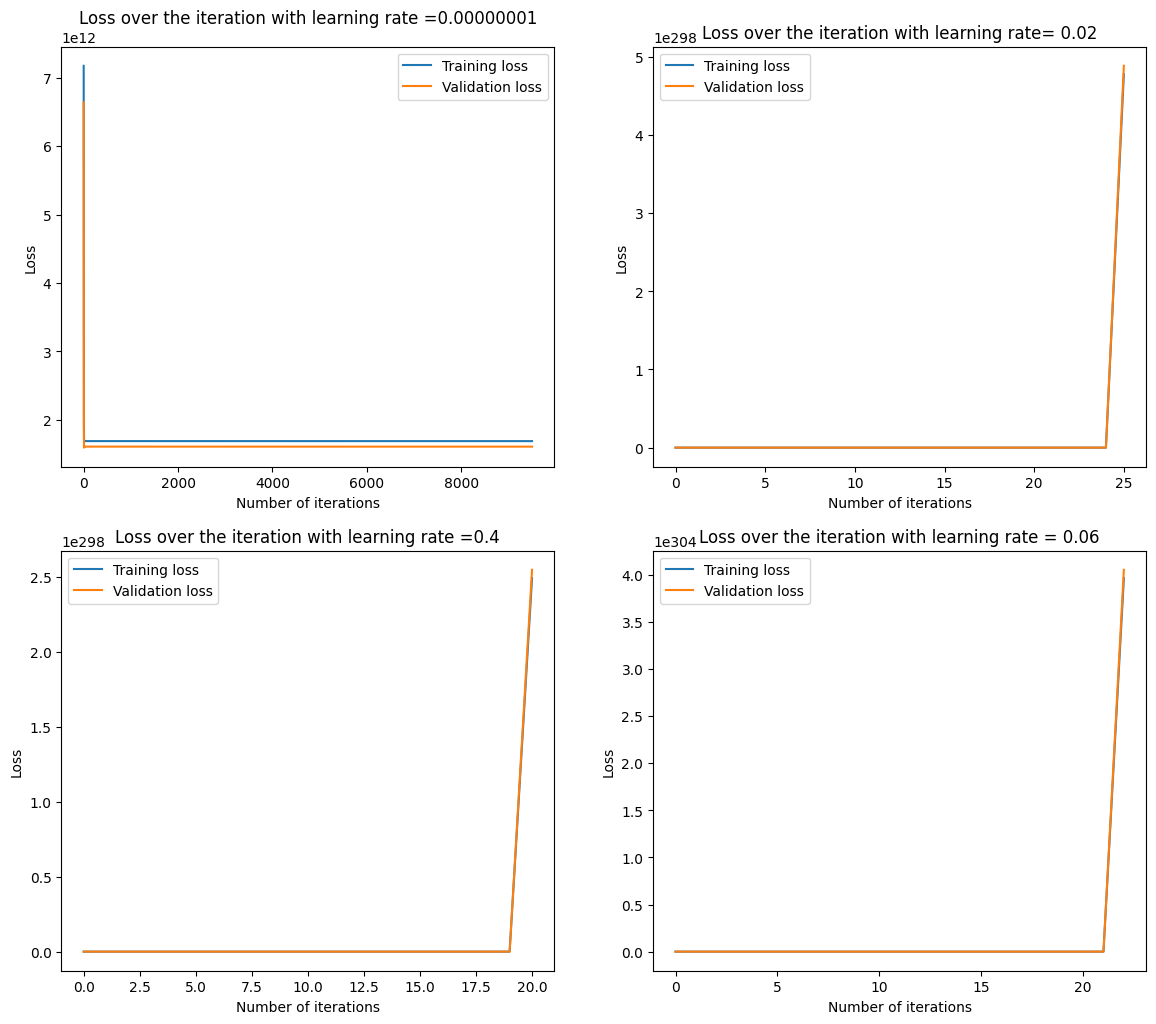

<Figure size 640x480 with 0 Axes>

In [228]:
plt.figure(figsize=(14, 12))  # Adjust the figure size as needed


plt.subplot(2, 2, 1)
plt.plot([X for X in range(iterations1)],t_cost1a,label="Training loss")
plt.plot([X for X in range(iterations1)],v_cost1a,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration with learning rate =0.00000001')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot([X for X in range(iterations2)],t_cost1a1,label="Training loss")
plt.plot([X for X in range(iterations2)],v_cost1a1,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration with learning rate= 0.02')
plt.legend()



plt.subplot(2, 2, 3)
plt.plot([X for X in range(iterations3)],t_cost1a2,label="Training loss")
plt.plot([X for X in range(iterations3)],v_cost1a2,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration with learning rate =0.4')
plt.legend()



plt.subplot(2, 2, 4)
plt.plot([X for X in range(iterations4)],t_cost1a3,label="Training loss")
plt.plot([X for X in range(iterations4)],v_cost1a3,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration with learning rate = 0.06')
plt.legend()
plt.show()
# Adjust the spacing between subplots
plt.tight_layout()

# Show all the subplots
plt.show()

1b

In [ ]:
variables = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
x_train1b,y_train1b = preprocess(train,variables)
x_test1b,y_test1b = preprocess(test,variables)
theta = np.zeros(12).reshape(12,1)
iterations = 1500
alpha= 0.000000001
theta1b,t_cost1b,v_cost1b= find_linear_regression(x_train1b,x_test1b,y_train1b,y_test1b,theta,alpha,iterations)
print(theta1b)
print(t_cost1b[-1])
print(v_cost1b[-1])


[[6.83989834e-01]
 [8.61912304e+02]
 [2.46906244e+00]
 [1.38341771e+00]
 [2.09839696e+00]
 [5.93446945e-01]
 [2.37475492e-01]
 [3.76360552e-01]
 [1.09144032e-01]
 [5.09626253e-01]
 [5.44770822e-01]
 [2.58799839e-01]]
1690102354386.6458
1609467428517.4346


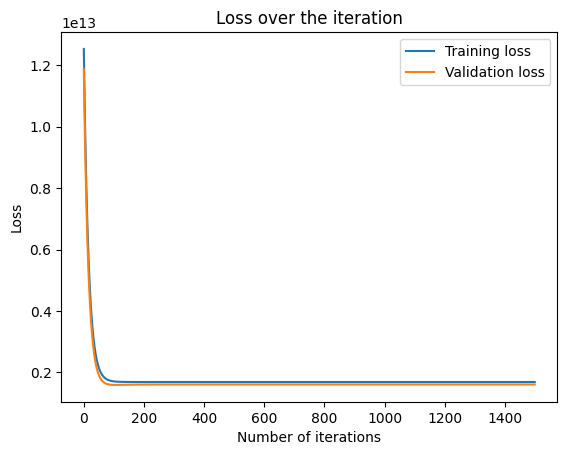

In [229]:
plt.plot([x for x in range(iterations)],t_cost1b,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost1b,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.legend()
plt.show()

In [ ]:
theta = np.zeros(12).reshape(12,1)
iterations2 = 50
alpha2= 0.02
theta1b1,t_cost1b1,v_cost1b1= find_linear_regression(x_train1b,x_test1b,y_train1b,y_test1b,theta,alpha2,iterations2)
iterations3 = 50
alpha3= 0.4
theta1b2,t_cost1b2,v_cost1b2= find_linear_regression(x_train1b,x_test1b,y_train1b,y_test1b,theta,alpha3,iterations3)
iterations4 = 50
alpha4= 0.06
theta1b3,t_cost1b3,v_cost1b3= find_linear_regression(x_train1b,x_test1b,y_train1b,y_test1b,theta,alpha4,iterations4)

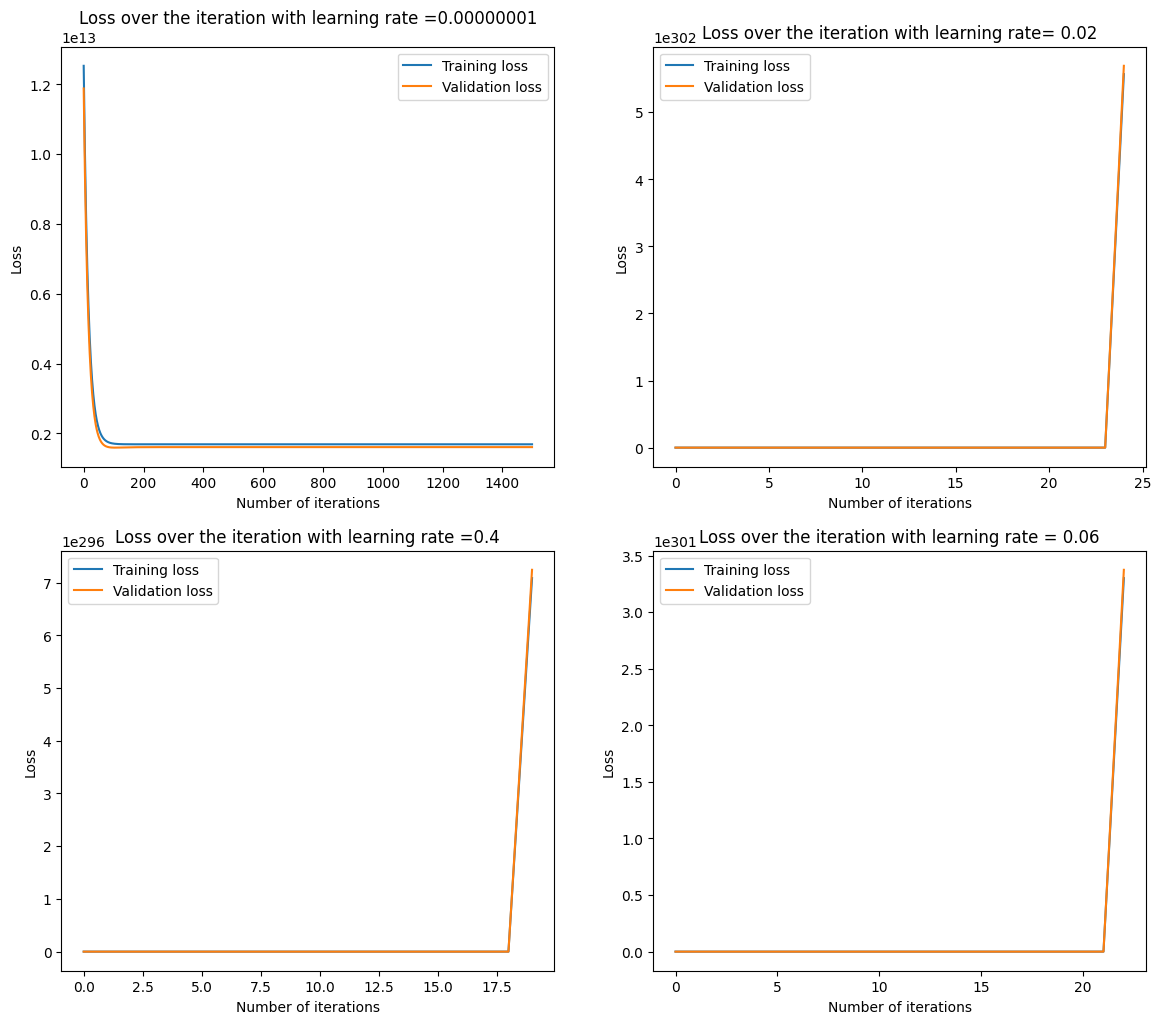

<Figure size 640x480 with 0 Axes>

In [230]:
plt.figure(figsize=(14, 12))  # Adjust the figure size as needed


plt.subplot(2, 2, 1)
plt.plot([x for x in range(iterations)],t_cost1b,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost1b,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration with learning rate =0.00000001')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot([x for x in range(iterations2)],t_cost1b1,label="Training loss")
plt.plot([x for x in range(iterations2)],v_cost1b1,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration with learning rate= 0.02')
plt.legend()



plt.subplot(2, 2, 3)
plt.plot([x for x in range(iterations3)],t_cost1b2,label="Training loss")
plt.plot([x for x in range(iterations3)],v_cost1b2,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration with learning rate =0.4')
plt.legend()



plt.subplot(2, 2, 4)
plt.plot([x for x in range(iterations4)],t_cost1b3,label="Training loss")
plt.plot([x for x in range(iterations4)],v_cost1b3,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration with learning rate = 0.06')
plt.legend()
plt.show()
# Adjust the spacing between subplots
plt.tight_layout()

# Show all the subplots
plt.show()

problem 2a

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
standard = StandardScaler()

In [ ]:
x_test_scaler = scaler.fit_transform(x_test1a)
x_train_scaler = scaler.fit_transform(x_train1a)
x_test_normalised = standard.fit_transform(x_test1a)
x_train_normalised = standard.fit_transform(x_train1a)

In [ ]:
theta = np.zeros(6).reshape(6,1)
iterations = 1500
alpha = 0.06
theta2a,t_cost2a,v_cost2a = find_linear_regression(x_train_scaler, x_test_scaler,y_train1a,y_test1a,theta,alpha,iterations)
print(theta2a)
print(t_cost2a[-1])
print(v_cost2a[-1])

[[      0.        ]
 [6323234.51604951]
 [5438972.59508774]
 [2603682.13160215]
 [1532968.8160088 ]
 [1283271.54196929]]
1055641366750.9653
1638540279611.1396


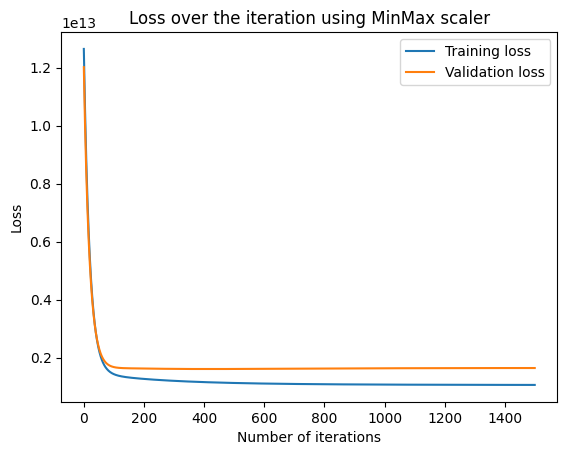

In [231]:
plt.plot([x for x in range(iterations)],t_cost2a,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2a,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using MinMax scaler')
plt.legend()
plt.show()

In [ ]:
theta = np.zeros(6).reshape(6,1)
iterations = 2500
alpha= 0.01
theta2a1,t_cost2a1,v_cost2a1 = find_linear_regression(x_train_normalised,  x_test_normalised,y_train1a,y_test1a,theta,alpha,iterations)
print(theta2a1)
print(t_cost2a1[-1])
print(v_cost2a1[-1])

[[     0.        ]
 [729932.37337428]
 [ 79334.92227873]
 [641264.68273525]
 [463855.73747135]
 [287331.17165107]]
12260544218074.309
11609071556690.264


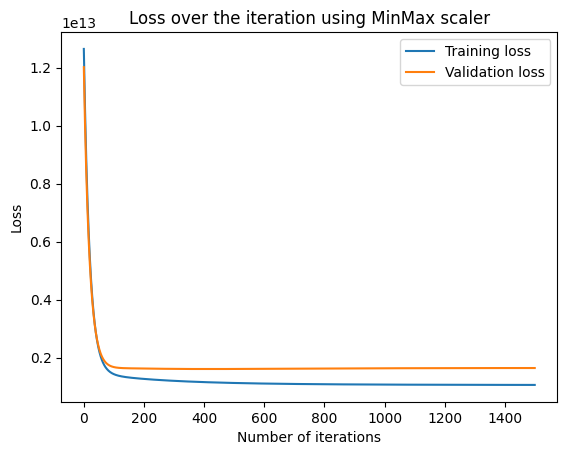

In [235]:
plt.plot([x for x in range(iterations)],t_cost2a,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2a,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using MinMax scaler')
plt.legend()
plt.show()

2b

In [ ]:
x_test_scaler2b = scaler.fit_transform(x_test1b)
x_train_scaler2b = scaler.fit_transform(x_train1b)
x_test_normalised2b = standard.fit_transform(x_test1b)
x_train_normalised2b = standard.fit_transform(x_train1b)

In [ ]:
theta = np.zeros(12).reshape(12,1)
iterations = 1500
alpha = 0.01
theta2b,t_cost2b,v_cost2b = find_linear_regression(x_train_scaler2b, x_test_scaler2b,y_train1b,y_test1b,theta,alpha,iterations)
print(theta2b)
print(t_cost2b[-1])
print(v_cost2b[-1])

[[      0.        ]
 [1623780.97698364]
 [2107363.69253752]
 [1447199.29569332]
 [1526338.15354606]
 [2101852.47748809]
 [ 490548.91344904]
 [ 542680.00166989]
 [ 725633.10597803]
 [1137102.45397912]
 [1157862.77505309]
 [ 608460.34589899]]
800624334883.8073
822114334743.38


In [ ]:
theta = np.zeros(12).reshape(12,1)
iterations = 1500
alpha= 0.01
theta2b1,t_cost2b1,v_cost2b1 = find_linear_regression(x_train_normalised2b, x_test_normalised2b,y_train1b,y_test1b,theta,alpha,iterations)
print(theta2b)
print(t_cost2b1[-1])
print(v_cost2b1[-1])

[[      0.        ]
 [1623780.97698364]
 [2107363.69253752]
 [1447199.29569332]
 [1526338.15354606]
 [2101852.47748809]
 [ 490548.91344904]
 [ 542680.00166989]
 [ 725633.10597803]
 [1137102.45397912]
 [1157862.77505309]
 [ 608460.34589899]]
12073743725060.732
11400604785229.504


In [ ]:
y_test_scaler2b = scaler.fit_transform(y_test1b)
y_train_scaler2b = scaler.fit_transform(y_train1b)
y_test_normalised2b = standard.fit_transform(y_test1b)
y_train_normalised2b = standard.fit_transform(y_train1b)

In [ ]:
theta = np.zeros(12).reshape(12,1)
iterations = 1500
alpha= 0.01
theta2by,t_cost2by,v_cost2by = find_linear_regression(x_train_scaler2b, x_test_scaler2b,y_train_scaler2b,y_test_scaler2b,theta,alpha,iterations)
print(theta2by)
print(t_cost2by[-1])
print(v_cost2by[-1])

[[0.        ]
 [0.11050496]
 [0.09339727]
 [0.12150164]
 [0.11105937]
 [0.08875473]
 [0.04629341]
 [0.02884604]
 [0.05410829]
 [0.09384943]
 [0.08758439]
 [0.05628315]]
0.005140830689728252
0.0055643122536989595


In [ ]:
theta = np.zeros(12).reshape(12,1)
iterations = 1500
alpha= 0.01
theta2by1,t_cost2by1,v_cost2by1 = find_linear_regression(x_train_normalised2b, x_test_normalised2b,y_train_normalised2b,y_test_normalised2b,theta,alpha,iterations)
print(theta2by1)
print(t_cost2by1[-1])
print(v_cost2by1[-1])

[[0.        ]
 [0.28564694]
 [0.03907543]
 [0.31017032]
 [0.19698986]
 [0.11278995]
 [0.07834933]
 [0.07788303]
 [0.10990308]
 [0.21445899]
 [0.11928001]
 [0.13713454]]
0.1650771794487914
0.16621769232616973


Text(0.5, 0.49, 'With scaling the output')

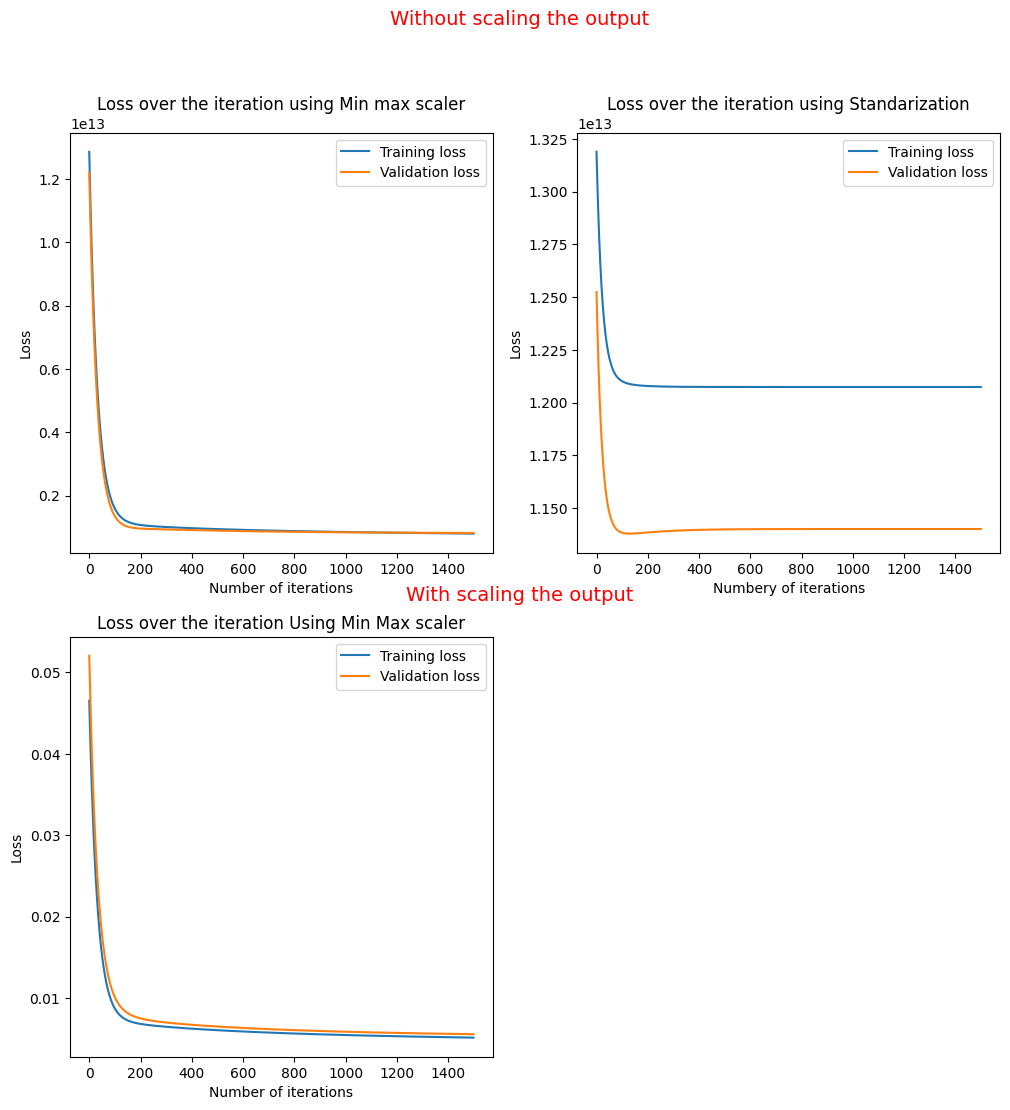

In [237]:
plt.figure(figsize=(12, 12))  # Adjust the figure size as needed


plt.subplot(2, 2, 1)
plt.plot([x for x in range(iterations)],t_cost2b,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2b,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Min max scaler')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot([x for x in range(iterations)],t_cost2b1,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2b1,label="Validation loss")
plt.xlabel('Numbery of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Standarization')
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y1 = 0.97 # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y1, 'Without scaling the output',color='red', ha='center', fontsize=14)

plt.subplot(2, 2, 3)
plt.plot([x for x in range(iterations)],t_cost2by,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2by,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration Using Min Max scaler')
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y2 = 0.49  # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y2, 'With scaling the output',color='red', ha='center', fontsize=14)

3a

In [ ]:
def find_loss_penalty(x,y,theta,beta):
  m = len(y)
  h= x.dot(theta)
  error = np.subtract(h,y)
  square_error = np.square(error)
  sum = (1/ (2*m)) *( (np.sum(square_error) )+ (beta * np.sum(np.square(theta))))
  return sum
def find_linear_regression_penalty(x_train,x_test,y_train,y_test,theta,iterations,learning_rate,beta):
  n = len(y_train)
  cost_history1 = np.zeros(iterations)
  cost_history2 = np.zeros(iterations)
  for i in range(iterations):
    h = x_train.dot(theta)
    error = np.subtract(h,y_train)
    diff = (1/(n))*((x_train.transpose()).dot(error) + beta * theta)
    theta = theta - learning_rate * diff
    cost_history1[i] = find_loss_penalty(x_train,y_train,theta,beta) # for training we are adding penalty
    cost_history2[i] = find_loss(x_test,y_test,theta) #For validation , there is no change in loss function
  return theta,cost_history1,cost_history2

In [ ]:
theta = np.zeros(6).reshape(6,1)
iterations = 1500
alpha = 0.05
beta = 1
theta2ap,t_cost2ap,v_cost2ap = find_linear_regression_penalty(x_train_scaler, x_test_scaler,y_train1a,y_test1a,theta, iterations, alpha, beta)
print(theta2ap)
print(t_cost2ap[-1])
print(v_cost2ap[-1])

[[      0.        ]
 [5912813.62635565]
 [5437537.22923605]
 [2458440.45951396]
 [1655639.58589645]
 [1447051.00570498]]
1151587570643.5393
1613828357234.3723


In [ ]:
theta = np.zeros(6).reshape(6,1)
iterations = 1500
alpha = 0.09
beta = 8
theta2a1p,t_cost2a1p,v_cost2a1p = find_linear_regression_penalty(x_train_normalised,  x_test_normalised,y_train1a,y_test1a,theta,iterations,alpha,beta)
print(theta2a1)
print(t_cost2a1p[-1])
print(v_cost2a1p[-1])

[[     0.        ]
 [729932.37337428]
 [ 79334.92227873]
 [641264.68273525]
 [463855.73747135]
 [287331.17165107]]
12271833166766.531
11606089587275.129


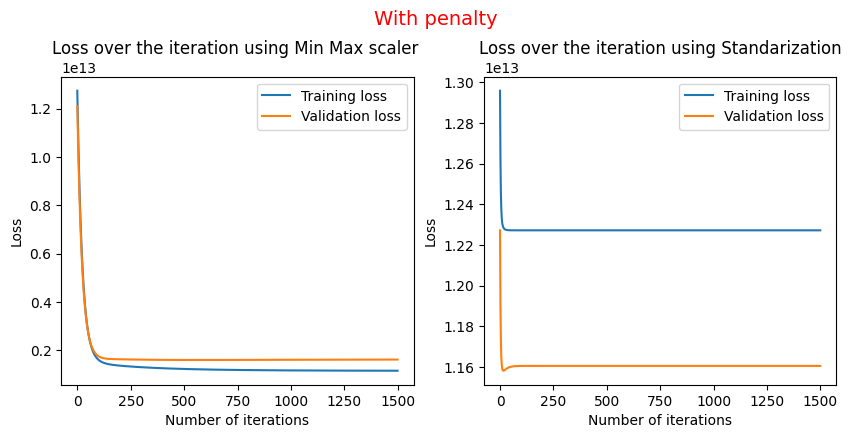

In [238]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot([x for x in range(iterations)],t_cost2ap,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2ap,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Min Max scaler ')
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y1 = 1.01  # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y1, 'With penalty',color='red', ha='center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot([x for x in range(iterations)],t_cost2a1p,label="Training loss")
plt.plot([x for x in range(iterations)],v_cost2a1p,label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Standarization')
plt.legend()
plt.show()

3b

In [ ]:
theta = np.zeros(12).reshape(12,1)
iterations = 1500
alpha = 0.01
beta = 3
theta2bp,t_cost2bp,v_cost2bp = find_linear_regression_penalty(x_train_scaler2b, x_test_scaler2b,y_train1b,y_test1b,theta,iterations,alpha,beta)
print(theta2bp)
print(t_cost2bp[-1])
print(v_cost2bp[-1])

[[      0.        ]
 [1579913.7828354 ]
 [2062988.19578456]
 [1396927.91301384]
 [1503757.23385373]
 [2120109.6672627 ]
 [ 491740.90477838]
 [ 556345.57187314]
 [ 701633.55097951]
 [1136646.79069514]
 [1143633.10731958]
 [ 611750.26276049]]
875818936811.3531
820252070464.4497


In [ ]:
theta = np.zeros(12).reshape(12,1)
iterations = 1500
alpha = 0.01
beta = 2
theta2b1p,t_cost2b1p,v_cost2b1p = find_linear_regression_penalty(x_train_normalised2b, x_test_normalised2b,y_train1b,y_test1b,theta,iterations,alpha,beta)
print(theta2b1p)
print(t_cost2b1p[-1])
print(v_cost2b1p[-1])

[[     0.        ]
 [530954.89247246]
 [ 74363.57492802]
 [576340.52470976]
 [366141.90597571]
 [210299.97180945]
 [146410.04710172]
 [144640.54654963]
 [204013.6482719 ]
 [399035.83589933]
 [222491.63478822]
 [255229.05429875]]
12076402404238.37
11400069674190.635


In [ ]:
theta = np.zeros(12).reshape(12,1)
iterations = 1500
alpha = 0.01
beta = 1
theta2byp,t_cost2byp,v_cost2byp = find_linear_regression_penalty(x_train_scaler2b, x_test_scaler2b,y_train_scaler2b,y_test_scaler2b,theta,iterations,alpha,beta)
print(theta2byp)
print(t_cost2byp[-1])
print(v_cost2byp[-1])

[[0.        ]
 [0.10936905]
 [0.09297561]
 [0.11993676]
 [0.11031082]
 [0.08946943]
 [0.04612058]
 [0.02914738]
 [0.05343667]
 [0.09361146]
 [0.08701195]
 [0.05611704]]
0.005249836460158036
0.005583845552512935


In [ ]:
theta = np.zeros(12).reshape(12,1)
iterations = 1500
alpha = 0.01
beta = 1
theta2by1p,t_cost2by1p,v_cost2by1p = find_linear_regression_penalty(x_train_normalised2b, x_test_normalised2b,y_train_normalised2b,y_test_normalised2b,theta,iterations,alpha,beta)
print(theta2by1p)
print(t_cost2by1p[-1])
print(v_cost2by1p[-1])

[[0.        ]
 [0.28516206]
 [0.03947549]
 [0.30959062]
 [0.19665004]
 [0.11277321]
 [0.07842544]
 [0.07771632]
 [0.10964347]
 [0.21420394]
 [0.1192866 ]
 [0.13698972]]
0.1654598792781836
0.1661349499304313


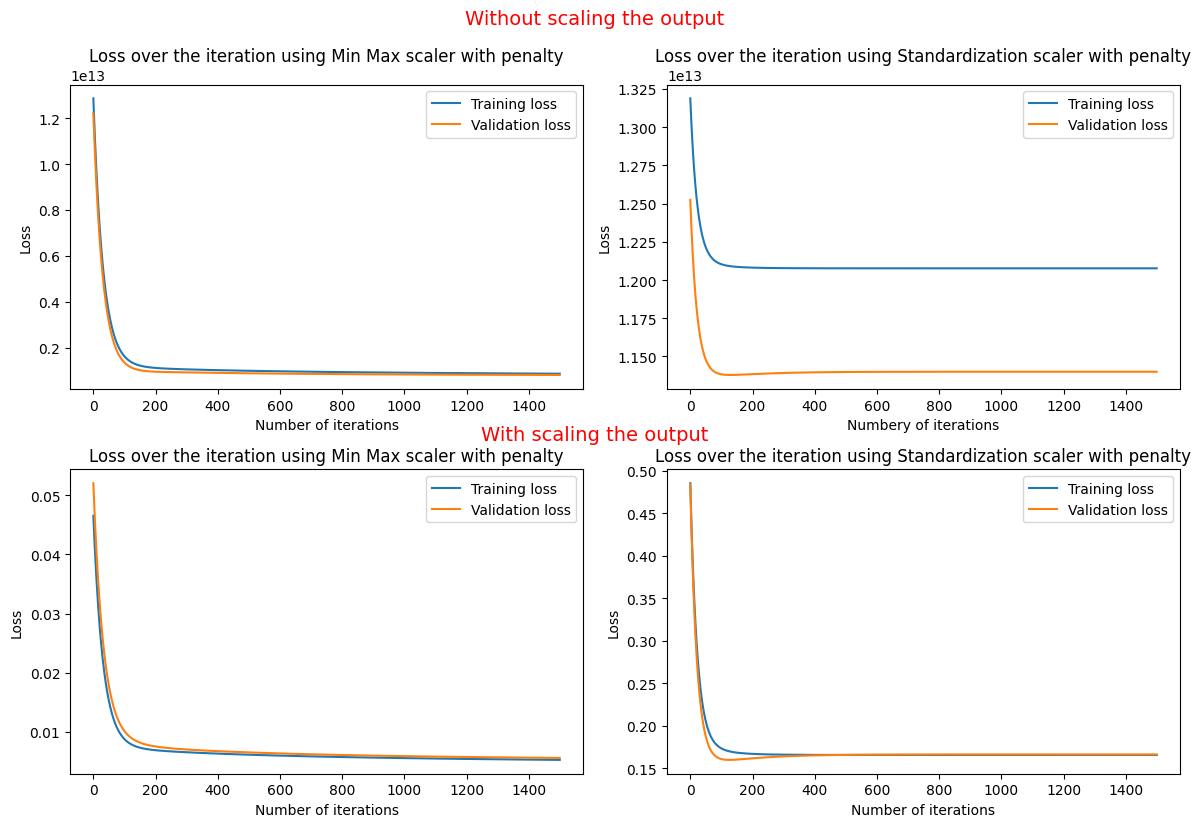

In [239]:
# Create a 2x2 grid of subplots
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Subplot 1: Min Max scaler with penalty and without normalizing outputs
plt.subplot(2, 2, 1)
plt.plot([x for x in range(iterations)], t_cost2bp, label="Training loss")
plt.plot([x for x in range(iterations)], v_cost2bp, label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Min Max scaler with penalty')
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y1 = 1.01  # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y1, 'Without scaling the output',color='red', ha='center', fontsize=14)

# Subplot 2: Standardization scaler with penalty and without normalizing outputs
plt.subplot(2, 2, 2)
plt.plot([x for x in range(iterations)], t_cost2b1p, label="Training loss")
plt.plot([x for x in range(iterations)], v_cost2b1p, label="Validation loss")
plt.xlabel('Numbery of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Standardization scaler with penalty')
plt.legend()

# Subplot 3: Min Max scaler with penalty and with normalizing outputs
plt.subplot(2, 2, 3)
plt.plot([x for x in range(iterations)], t_cost2byp, label="Training loss")
plt.plot([x for x in range(iterations)], v_cost2byp, label="Validation loss")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Min Max scaler with penalty')
plt.legend()

middle_x = 0.5  # X-coordinate for the middle of the subplots
middle_y2 = 0.49  # Y-coordinate for the middle title
plt.figtext(middle_x, middle_y2, 'With scaling the output',color='red', ha='center', fontsize=14)

# Subplot 4: Standardization scaler with penalty and with normalizing outputs
plt.subplot(2, 2, 4)
plt.plot([x for x in range(iterations)], t_cost2by1p, label="Training loss")
plt.plot([x for x in range(iterations)], v_cost2by1p, label="Validation loss")
plt.xlabel('Number- of iterations')
plt.ylabel('Loss')
plt.title('Loss over the iteration using Standardization scaler with penalty')
plt.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show all the subplots
plt.show()


